In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Alternatives'), 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-26 to 2019-07-10 - 12


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

11


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
RWX,47,0.405185,0.874676,0.417872,3.030299,1.910171
XLRE,47,0.682071,1.961221,0.327545,7.150584,4.835459
VNQI,47,0.341221,1.050912,0.286930,2.673419,2.604699
REET,47,0.461345,1.504966,0.280181,4.470628,3.361345
ICF,47,0.596434,2.008879,0.277145,6.525354,4.991450
RWO,47,0.410236,1.409736,0.262853,4.165770,3.132428
VNQ,47,0.536117,1.948807,0.254737,5.567796,5.135487
IYR,47,0.524818,1.957105,0.247884,5.537345,4.963136
USRT,47,0.494976,2.003013,0.227304,5.237676,5.198662


evicted VNQI 0.823 0.507
retry backlogs ['IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'USRT', 'REET', 'ICF'] at 0.905/-0.51 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.910/-0.52 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.915/-0.53 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.920/-0.54 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.925/-0.55 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.930/-0.56 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.935/-0.57 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.940/-0.58 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.945/-0.59 - 0.429
retry backlogs ['IYR', 'RWR', 'SCHH', 'VNQ', 'RWO', 'REET', 'USRT', 'ICF'] at 0.950/-0.60 - 0

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,47.0,0.433185,0.920449,-1.326269,-0.291401,0.540336,1.096089,2.382058,0.427511,3.458809,1.679727
RWX,47.0,0.405185,0.874676,-1.207602,-0.306682,0.540541,1.034150,2.321985,0.417872,3.030299,1.910171
XLRE,47.0,0.682071,1.961221,-4.263532,-0.643475,0.774785,2.289701,4.319119,0.327545,7.150584,4.835459


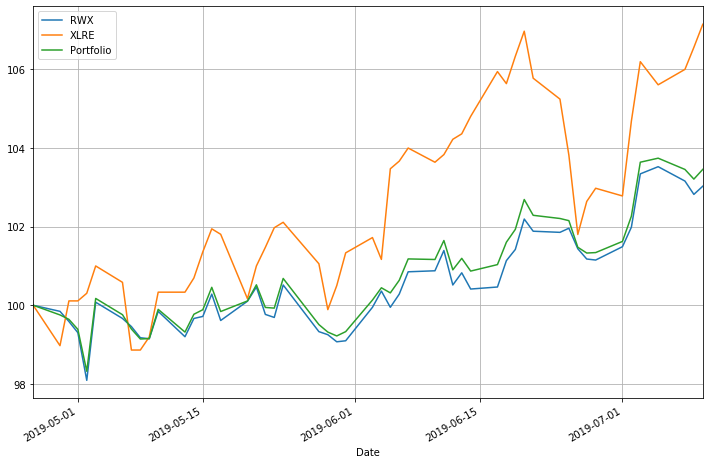

In [6]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)